## 卷积神经网络——Regression example

In [1]:
from sklearn import datasets

'''
The regression example of the Boston dataset.
'''

boston = datasets.load_boston()

X, y = boston.data, boston.target.reshape(-1, 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [2]:
print(X_train.shape)
print(y_train.shape)

(404, 13)
(404, 1)


### 需要扩充 X 的feature，将其变成一个 matrix

In [3]:
# 使用多项式增强
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [4]:
X_train_poly.shape

(404, 105)

In [5]:
# 只用前面 100 个维度
X_train_poly_100, X_test_poly_100 = X_train_poly[:, :-5], X_test_poly[:, :-5]

In [6]:
X_train_poly_100.shape

(404, 100)

### 调用 DeeplearningRegression 里面的 CNN 框架

In [7]:
from frames.DeeplearningRegression import CNN

'''
参数说明：
channel_numbers: 每层卷积层的通道数，传入 list
kernel_size: 卷积核大小，默认(3,3)
kernel_stride: 卷积核步幅，默认 1
pooling_size: 池化核大小，默认（2，2）
pool_stride: 池化核步幅，默认 2
learning rete: 学习率，这里可以是一个 float，也可以是一个 len=3 的 list，当 lr 是 list 的时候，采用梯度衰减策略
activate function: 激活函数，默认 relu，改激活函数输入小写字符串即可，如：'tanh','sigmoid'
flatten: 卷积层后的平潭化操作，默认1024
dropout: 默认为 0，即不采用，这个参数是为了防止训练过拟合
epoch: 训练批次，默认 2000
batch_size: 默认 128
'''
cnn = CNN(channel_numbers=[64, 32], learning_rate=[1e-3, 1e-5, 1e-7], epoch=1000, batch_size=256) # 采用梯度衰减策略

In [8]:
%%time
cnn.fit(X_train_poly_100, y_train)

Training... epoch: 100, loss: 52.536956787109375
Training... epoch: 200, loss: 24.109113693237305
Training... epoch: 300, loss: 19.594324111938477
Training... epoch: 400, loss: 19.59052276611328
Training... epoch: 500, loss: 18.80476951599121
Training... epoch: 600, loss: 13.437728881835938
Training... epoch: 700, loss: 9.832077980041504
Training... epoch: 800, loss: 12.446349143981934
Training... epoch: 900, loss: 9.76864242553711
Training... epoch: 1000, loss: 9.356754302978516
Training completed!
CPU times: user 8min 41s, sys: 1min 19s, total: 10min
Wall time: 55.5 s


### 调用 score 得到结果，调用 predict 得到值

In [9]:
cnn.score(X_test_poly_100, y_test)

mse: 22.17480238178066, rmse: 4.7090128882580755, mae: 3.6345859004001992, r2: 0.7880698988545218


### 调用 result_plot 保存结果图

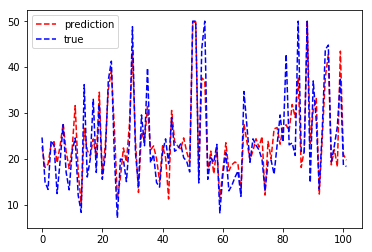

Save the picture successfully!


In [13]:
import os

save_path = './Example_save_resultes/Regression/save_pngs'
if not os.path.exists(save_path):
    os.makedirs(save_path)
    
save_png = os.path.join(save_path, 'cnn_picture.png')
cnn.result_plot(X_test_poly_100, y_test, save_file=save_png, is_show=True)

### 保存模型结果, 这里有两个参数，统计 dataset 是否使用了 标准化 和 pca 的预处理

In [11]:
results_file = './Example_save_resultes/Regression/cnn_result.csv'
cnn.save_result(results_file, is_standard=False, is_PCA=False)

Save results success!


### 调用 loss_plot 查看训练过程， loss 的变化

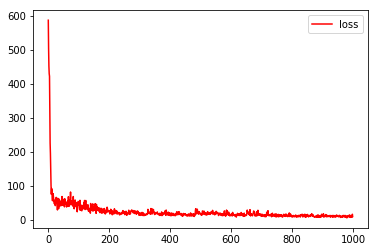

In [12]:
cnn.loss_plot()